In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
import matplotlib.image as mimg
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("D:\Study\Data Analytics Resources+Projects\Projects\Machine Learning\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate Analysis

In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

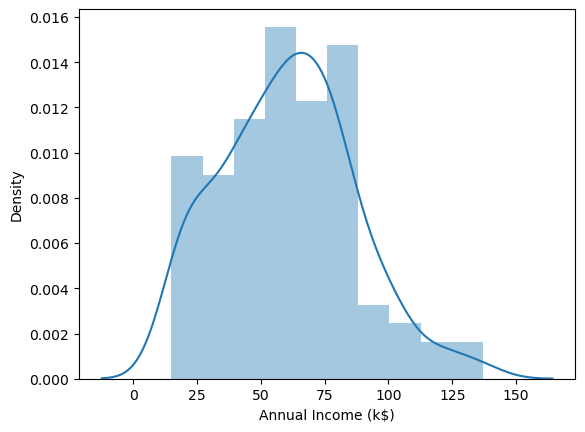

In [5]:
sns.distplot(data['Annual Income (k$)'])

In [6]:
 data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

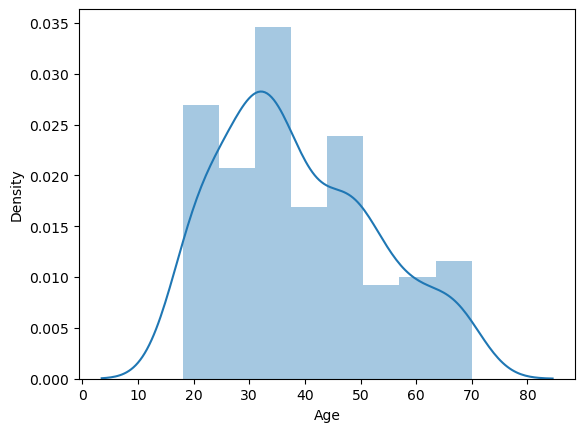

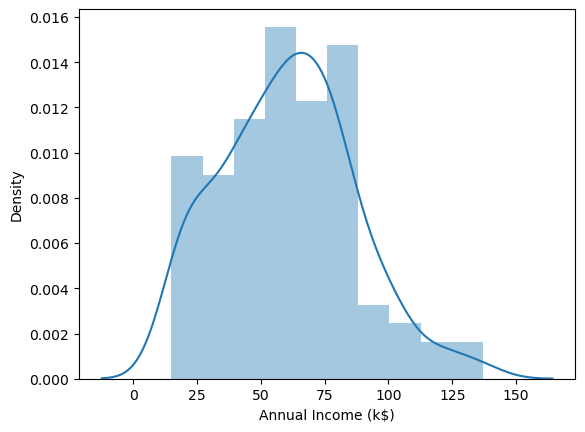

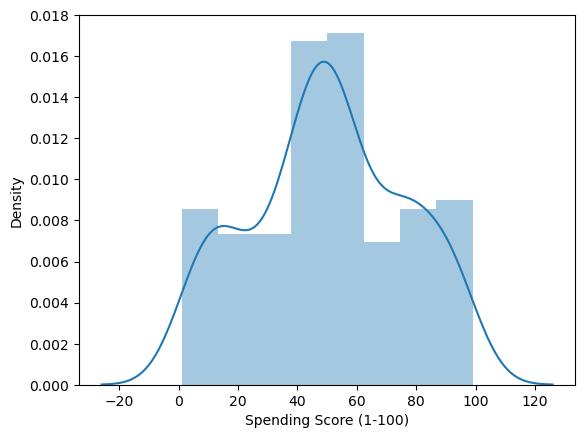

In [7]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.distplot(data[i])

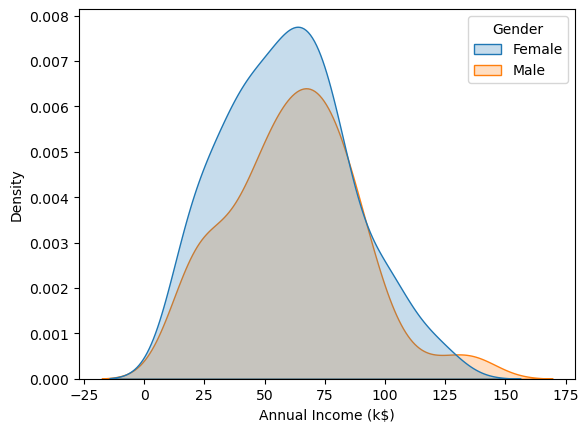

In [8]:
#ensuring gender is a categorical data

data['Gender']=data['Gender'].astype('category')

sns.kdeplot(data=data,x='Annual Income (k$)',shade=True,hue='Gender');

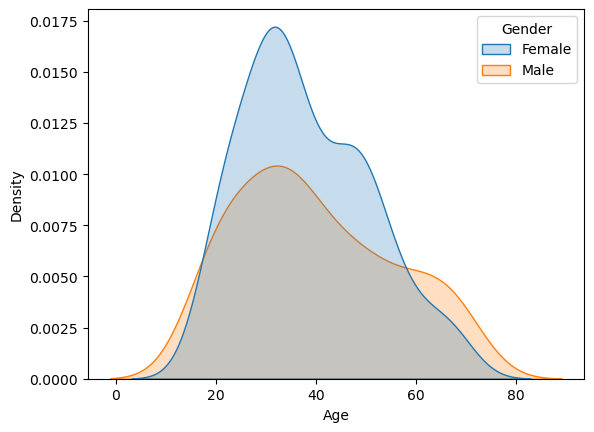

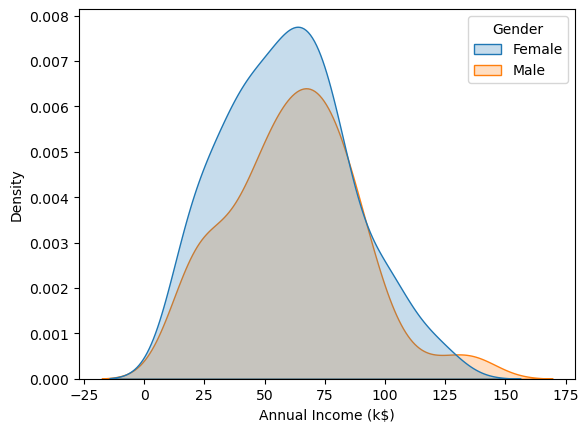

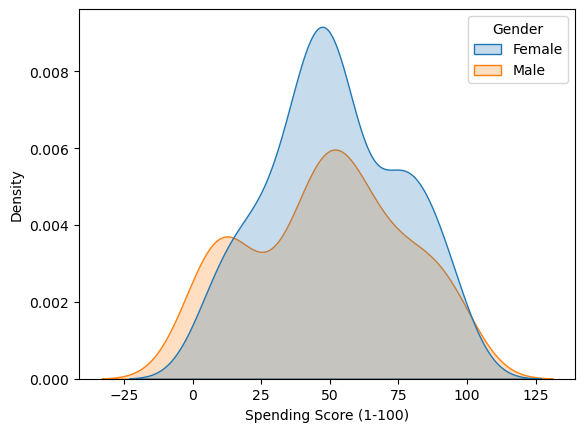

In [9]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=data, x=i,shade=True, hue='Gender')

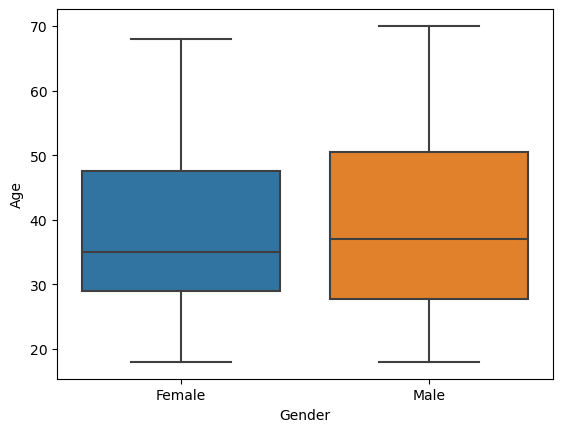

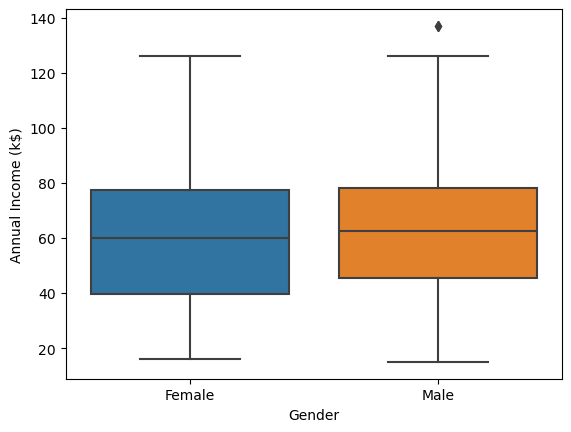

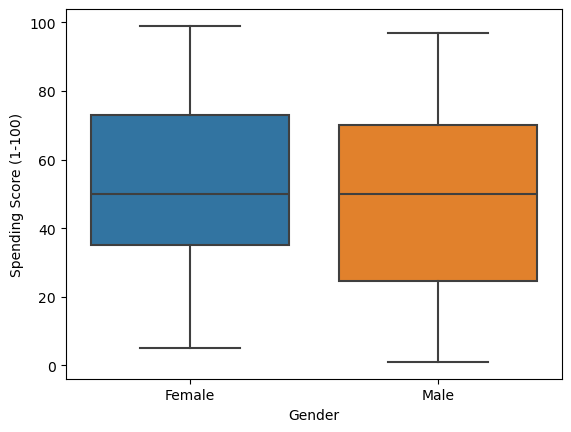

In [10]:
columns=['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure()
    sns.boxplot(data=data, x='Gender', y=data[i])

In [11]:
data['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

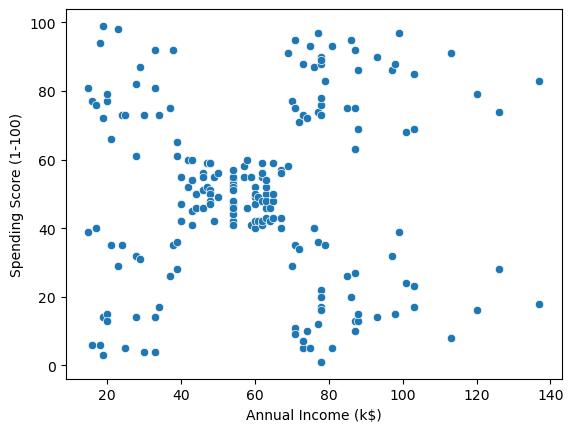

In [12]:
 #To find that if there is any clusters or not?

sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')

As we can see that there is 5 clusters

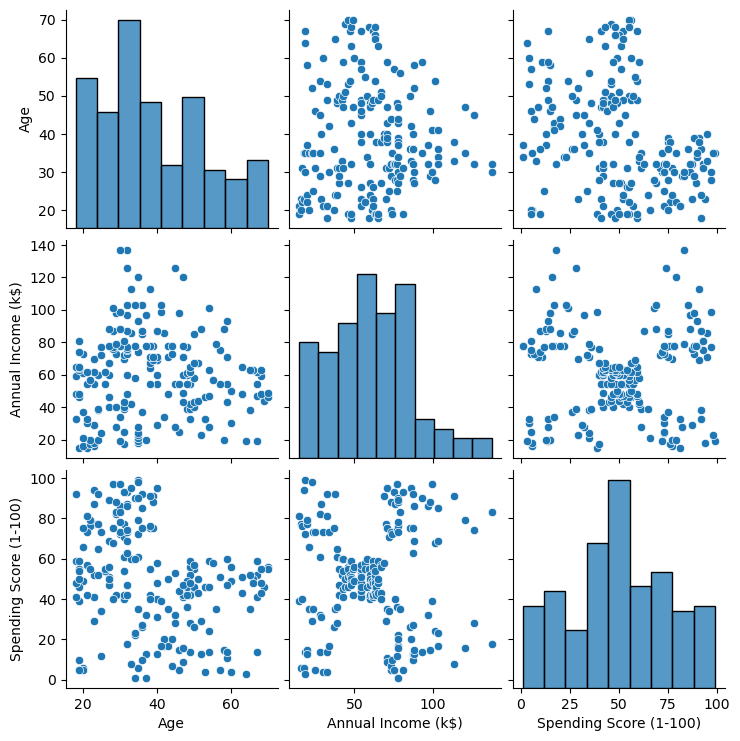

In [13]:
data=data.drop('CustomerID',axis=1)  #dropping customerID because it cannot add much value to our analysis
sns.pairplot(data)

In [14]:
data.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


###### As we can see here by using of bivariate analysis that females are younger than males and males have higher annual income but females spends the most

In [15]:
#finding correlation


#data['Gender']=data['Gender'].map({'Male':0, 'Female':1})

desired_cols=['Age', 'Annual Income (k$)','Spending Score (1-100)']
data[desired_cols].corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

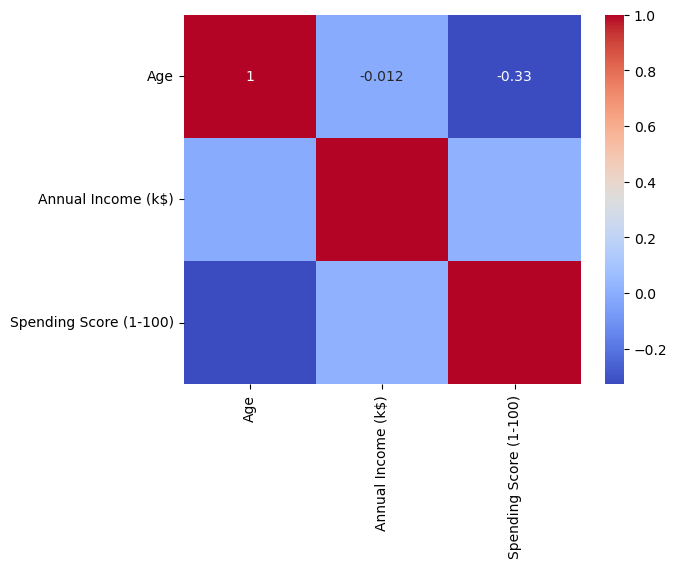

In [16]:
sns.heatmap(data[desired_cols].corr(),annot=True,cmap='coolwarm')


### Initializing Clustering-Univariate, Bivariate, Multivariate

In [17]:
clustering1 = KMeans(n_clusters=3)

In [18]:
clustering1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [19]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [20]:
data['Income Cluster'] = clustering1.labels_
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1


In [21]:
data['Income Cluster'].value_counts()

Income Cluster
2    90
1    74
0    36
Name: count, dtype: int64

In [22]:
clustering1.inertia_         #inertia reperesents distance between the centroids

23517.330930930933

In [23]:
inertia_scores = []
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(data[['Annual Income (k$)']])
    inertia_scores.append(Kmeans.inertia_)

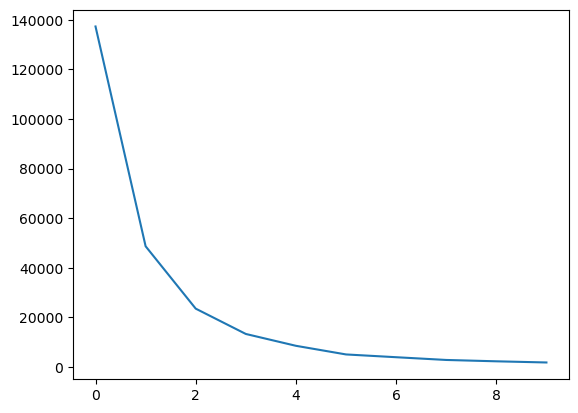

In [24]:
plt.plot(inertia_scores)

##### as we can see its making elbow at 3 so number of clusters will be 3

In [25]:
data.groupby('Income Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.833333,99.888889,50.638889
1,39.500000,33.486486,50.229730
2,38.722222,67.088889,50.000000


### Bivariate Clustering

In [26]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
data['Spending and Income Cluster']=clustering2.labels_
data.head() 

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


In [27]:
inertia_scores2 = []
for i in range(1,11):
    Kmeans2=KMeans(n_clusters = 5)
    Kmeans2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(Kmeans2.inertia_)

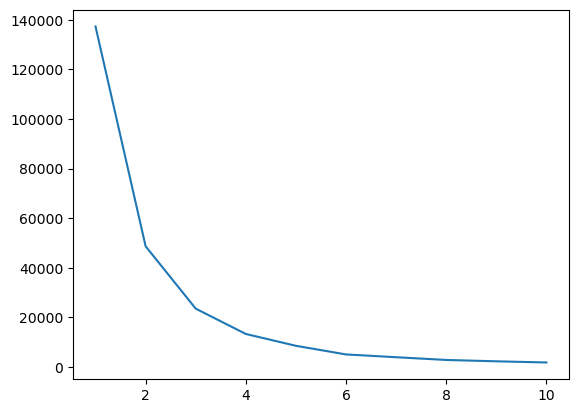

In [28]:
plt.plot(range(1,11),inertia_scores)

In [29]:
clustering2.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [30]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

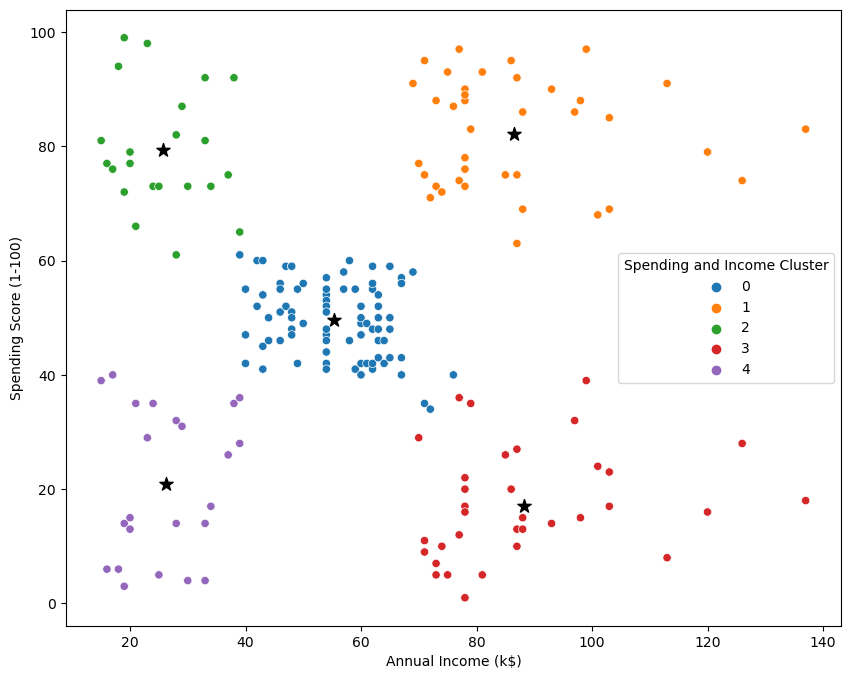

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'], y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data, x='Annual Income (k$)',y='Spending Score (1-100)', hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [32]:
pd.crosstab(data['Spending and Income Cluster'],data['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.590909,0.409091
3,0.457143,0.542857
4,0.608696,0.391304


In [33]:
data.groupby('Spending and Income Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


#### Multivariate Clustering

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scale = StandardScaler()

In [36]:
df=data

In [37]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4


In [38]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [39]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,0,19,15,39,1,4
1,0,21,15,81,1,2
2,1,20,16,6,1,4
3,1,23,16,77,1,2
4,1,31,17,40,1,4


In [40]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster'],
      dtype='object')

In [41]:
df=df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [42]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [43]:
df=scale.fit_transform(df)

In [44]:
df=pd.DataFrame(scale.fit_transform(df))

In [45]:
df.head()

,0,1,2,3
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [46]:
inertia_scores3 = []
for i in range(1,11):
    Kmeans3=KMeans(n_clusters = i)
    Kmeans3.fit(df)
    inertia_scores3.append(Kmeans3.inertia_)

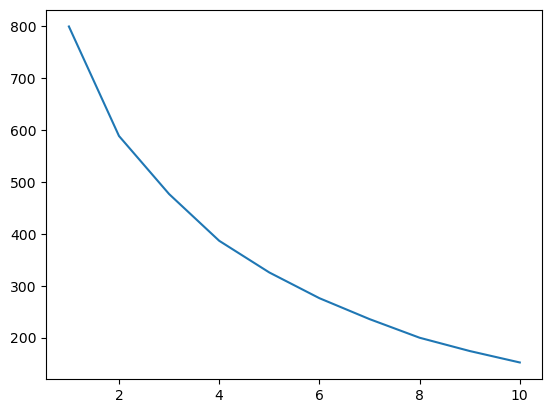

In [47]:
plt.plot(range(1,11),inertia_scores3)

In [55]:
data

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,4
1,Male,21,15,81,1,2
2,Female,20,16,6,1,4
3,Female,23,16,77,1,2
4,Female,31,17,40,1,4
...,...,...,...,...,...,...
195,Female,35,120,79,0,1
196,Female,45,126,28,0,3
197,Male,32,126,74,0,1
198,Male,32,137,18,0,3


In [56]:
data.to_csv('Clustering.csv')

In [62]:
img = mimg.imread('clustering_bivariate.png') 

# ANALYSIS

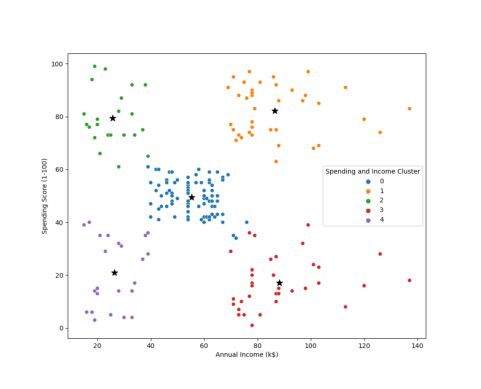

In [65]:
plt.imshow(img)
plt.axis('off')  
plt.show()


#### Target Cluster

--Target group will be Cluster 1 which has Highest spending score and high annual Income


--Approx 54% of Cluster 1 shoppers are females. We should look these customers to attract and made them purchase more by doing marketing campaings and targeting popular items for these customers.

--Cluster 2 is a great opportunity to market them to the customers for sales event on popular items.